<h1> Multi-Layer Perceptrons </h1>

In [47]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import tensorflow as tf
import keras


import matplotlib.pyplot as plt
import numpy as np
import time

from keras.models import Sequential 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense, Activation 

%matplotlib notebook

In [6]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [11]:
# Input Parameters

epochs=20
batch=128
Input=X_train.shape[1]
Output=10


<h2> 1. MLP+Re-Lu+Adam optimizer(784-512-256-10) </h2>

In [12]:
#Initialising all the layers

model1=Sequential()
model1.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model1.add(Activation('relu'))

model1.add(Dense(256,kernel_initializer='he_normal'))
model1.add(Activation('relu'))

model1.add(Dense(Output,kernel_initializer='glorot_normal'))
model1.add(Activation(tf.nn.softmax))


In [13]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling the model
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

his=model1.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.2220 - acc: 0.9351 - val_loss: 0.1051 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0814 - acc: 0.9747 - val_loss: 0.0831 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0511 - acc: 0.9836 - val_loss: 0.0641 - val_acc: 0.9778
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0340 - acc: 0.9895 - val_loss: 0.0643 - val_acc: 0.9807
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0744 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0704 - val_acc: 0.9796
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.0904 - val_a

In [15]:
#Evaluate the accuracy and test loss

score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.119451443693
Test accuracy: 0.9759


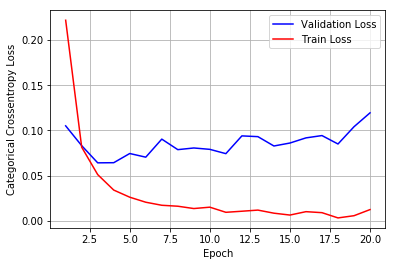

In [16]:
#Plotting the the train and test loss for each epochs

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 2. MLP-ReLu-Adam(784-512-256-128-10) </h2>

In [17]:
#Initialising all the layers
model2=Sequential()

#Hidden layer_1
model2.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model2.add(Activation('relu'))

#Hidden layer_2
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))

#hidden layer_3
model2.add(Dense(128,kernel_initializer='he_normal'))
model2.add(Activation('relu'))

#Output layer
model2.add(Dense(10,kernel_initializer='glorot_normal'))
model2.add(Activation(tf.nn.softmax))

In [18]:
#Summary of the model
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
__________

In [19]:
#Compiling the layer

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model2.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2301 - acc: 0.9318 - val_loss: 0.1093 - val_acc: 0.9667
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0851 - acc: 0.9729 - val_loss: 0.0820 - val_acc: 0.9744
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0543 - acc: 0.9828 - val_loss: 0.0686 - val_acc: 0.9788
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0388 - acc: 0.9878 - val_loss: 0.0742 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0982 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0220 - acc: 0.9926 - val_loss: 0.0777 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0239 - acc: 0.9917 - val_loss: 0.0811 - val_acc

In [20]:
#Evaluate accuracy and test loss

score=model2.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The test accuracy is ",score[1])

10000/10000 [==============================] - 1s 66us/step
The test loss is  0.0839298459997
The test accuracy is  0.9825


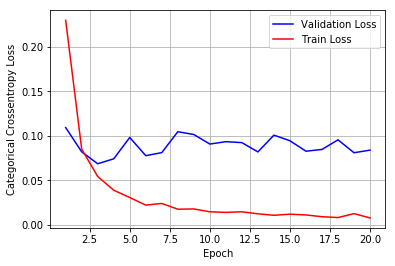

In [21]:
#Plotting the training and test error on each epochs

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3. MLP-ReLu-Adam(784-512-256-128-64-32-10) </h2>

In [22]:
#Initialising all Layers
model3=Sequential()

#Hidden Layer 1
model3.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model3.add(Activation('relu'))

#Hidden Layer 2
model3.add(Dense(256,kernel_initializer='he_normal'))
model3.add(Activation('relu'))

#Hidden layer 3
model3.add(Dense(128,kernel_initializer='he_normal'))
model3.add(Activation('relu'))

#Hidden Layer 4
model3.add(Dense(64,kernel_initializer='he_normal'))
model3.add(Activation('relu'))

#Hidden Layer 5
model3.add(Dense(32,kernel_initializer='he_normal'))
model3.add(Activation('relu'))

#Output Layer

model3.add(Dense(10,kernel_initializer='glorot_normal'))
model3.add(Activation(tf.nn.softmax))

In [23]:
#Model Summary
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
__________

In [24]:
#Compile
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model3.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2547 - acc: 0.9232 - val_loss: 0.1063 - val_acc: 0.9692
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0926 - acc: 0.9719 - val_loss: 0.1032 - val_acc: 0.9691
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0598 - acc: 0.9813 - val_loss: 0.0771 - val_acc: 0.9759
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0695 - val_acc: 0.9792
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0363 - acc: 0.9877 - val_loss: 0.0718 - val_acc: 0.9804
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0303 - acc: 0.9901 - val_loss: 0.0765 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0263 - acc: 0.9914 - val_loss: 0.0680 - val_acc

In [25]:
#Test loss and accuracy

score=model3.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 76us/step
The test loss is  0.075569450206
The accuracy is  0.9842


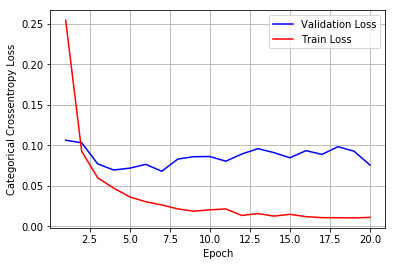

In [26]:
#plotting the train and tes loss for each epoch 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 4. MLP-ReLu-Dropout-Adam (784-512-DP-256-DP-10) </h2>

In [27]:
#Initialising all layers
model4=Sequential()

#Hidden Layer 1
model4.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model4.add(Activation('relu'))

#Dropout layer
model4.add(Dropout(0.5))

#Hidden layer 2
model4.add(Dense(256,kernel_initializer='he_normal'))
model4.add(Activation('relu'))

#Dropout layer
model4.add(Dropout(0.5))

#Output Layer
model4.add(Dense(Output,kernel_initializer='glorot_normal'))
model4.add(Activation(tf.nn.softmax))


In [28]:
#Model Summary
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
__________

In [29]:
# Compile

model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model4.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.4619 - acc: 0.8573 - val_loss: 0.1450 - val_acc: 0.9552
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2003 - acc: 0.9421 - val_loss: 0.1033 - val_acc: 0.9683
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1568 - acc: 0.9542 - val_loss: 0.0865 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1323 - acc: 0.9619 - val_loss: 0.0822 - val_acc: 0.9760
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1140 - acc: 0.9654 - val_loss: 0.0747 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1041 - acc: 0.9685 - val_loss: 0.0751 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0955 - acc: 0.9714 - val_loss: 0.0680 - val_acc

In [30]:
# Test loss and Accuracy

score=model4.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 70us/step
The test loss is  0.0616500246239
The accuracy is  0.983


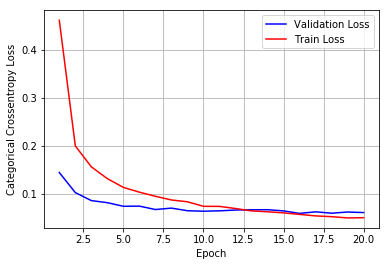

In [32]:
#plotting the train and test loss for each epoch 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP-ReLu-Dropout-Adam(784-512-Dp-256-Dp-128-Dp-10) </h2>

In [34]:
#Initilaiisng the layer

model5=Sequential()

#Hidden Layer 1

model5.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model5.add(Activation('relu'))

#Dropout Layer
model5.add(Dropout(0.5))

#Hidden Layer 2
model5.add(Dense(256,kernel_initializer='he_normal'))
model5.add(Activation('relu'))

#Dropout Layer
model5.add(Dropout(0.5))

#Hidden Layer 3
model5.add(Dense(128,kernel_initializer='he_normal'))
model5.add(Activation('relu'))

#Dropout Layer
model5.add(Dropout(0.5))

#Output layer
model5.add(Dense(Output,kernel_initializer='glorot_normal'))
model5.add(Activation(tf.nn.softmax))


In [35]:
#Model summary
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_18 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
__________

In [37]:
#Compile

model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model5.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.6169 - acc: 0.8063 - val_loss: 0.1707 - val_acc: 0.9501
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2535 - acc: 0.9299 - val_loss: 0.1225 - val_acc: 0.9643
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1916 - acc: 0.9468 - val_loss: 0.1059 - val_acc: 0.9701
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1602 - acc: 0.9550 - val_loss: 0.0971 - val_acc: 0.9720
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1429 - acc: 0.9602 - val_loss: 0.0859 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1275 - acc: 0.9644 - val_loss: 0.0826 - val_acc: 0.9763
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1168 - acc: 0.9674 - val_loss: 0.0761 - val_acc

In [38]:
#Test loss and Accuracy

score=model5.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 80us/step
The test loss is  0.0643543138517
The accuracy is  0.9824


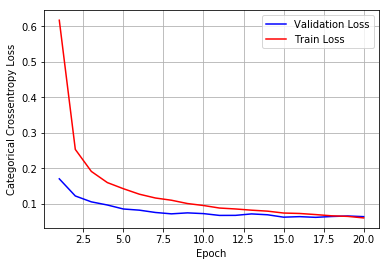

In [39]:
#plotting train and test loss for each epochs
 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 6. MLP-ReLu-Adam-Dropout (784-512-Dp-256-Dp-128-Dp-64-Dp-32-Dp-10) </h2>

In [40]:
#Initialising all layers
model6=Sequential()

# Hidden Layer 1
model6.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model6.add(Activation('relu'))

#Dropout Layer
model6.add(Dropout(0.5))

#Hidden layer 2
model6.add(Dense(256,kernel_initializer='he_normal'))
model6.add(Activation('relu'))

#Dropout Layer
model6.add(Dropout(0.5))

#Hidden Layer 3
model6.add(Dense(128,kernel_initializer='he_normal'))
model6.add(Activation('relu'))

#Dropout Layer
model6.add(Dropout(0.5))

#Hidden layer 4
model6.add(Dense(64,kernel_initializer='he_normal'))
model6.add(Activation('relu'))

#Dropout Layer
model6.add(Dropout(0.5))

#Hidden Layer 5
model6.add(Dense(32,kernel_initializer='he_normal'))
model6.add(Activation('relu'))

#Dropout Layer
model6.add(Dropout(0.5))

#Output Layer
model6.add(Dense(Output,kernel_initializer='glorot_normal'))
model6.add(Activation(tf.nn.softmax))


In [41]:
#Model summary
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_21 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
__________

In [42]:
#Compile
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model6.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 1.7124 - acc: 0.3829 - val_loss: 0.6910 - val_acc: 0.7342
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.8352 - acc: 0.6906 - val_loss: 0.4987 - val_acc: 0.8183
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.6374 - acc: 0.7867 - val_loss: 0.3239 - val_acc: 0.9270
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4982 - acc: 0.8580 - val_loss: 0.2474 - val_acc: 0.9468
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4219 - acc: 0.8890 - val_loss: 0.2008 - val_acc: 0.9527
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3663 - acc: 0.9070 - val_loss: 0.1781 - val_acc: 0.9615
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.3252 - acc: 0.9182 - val_loss: 0.1576 - val_ac

In [43]:
#Test loss and Accuracy
score=model6.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 78us/step
The test loss is  0.124185562286
The accuracy is  0.9744


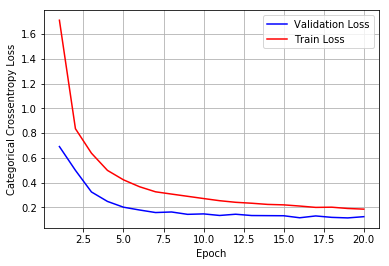

In [44]:
#plotting the train and test loss for each epoch 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 7. MLP-ReLu-BN-Adam (784-512-BN-256-BN-10) </h2>

In [53]:
#Initialising all layers
model7=Sequential()

#Hidden Layer 1
model7.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model7.add(Activation('relu'))

#Batch Normalization
model7.add(BatchNormalization())

#Hidden layer 2
model7.add(Dense(256,kernel_initializer='he_normal'))
model7.add(Activation('relu'))

#Batch Normalization
model7.add(BatchNormalization())

#Output Layer
model7.add(Dense(Output,kernel_initializer='glorot_normal'))
model7.add(Activation(tf.nn.softmax))


In [54]:
#Model summary
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_34 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_35 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                2570      
__________

In [55]:
#Compile
model7.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model7.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1811 - acc: 0.9447 - val_loss: 0.1170 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0696 - acc: 0.9786 - val_loss: 0.0870 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0427 - acc: 0.9864 - val_loss: 0.0700 - val_acc: 0.9778
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0314 - acc: 0.9902 - val_loss: 0.0882 - val_acc: 0.9726
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0252 - acc: 0.9917 - val_loss: 0.0798 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0763 - val_acc: 0.9779
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0189 - acc: 0.9934 - val_loss: 0.0755 - val_ac

In [57]:
#Test loss and Accuracy
score=model7.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 86us/step
The test loss is  0.0738838885449
The accuracy is  0.9817


<IPython.core.display.Javascript object>


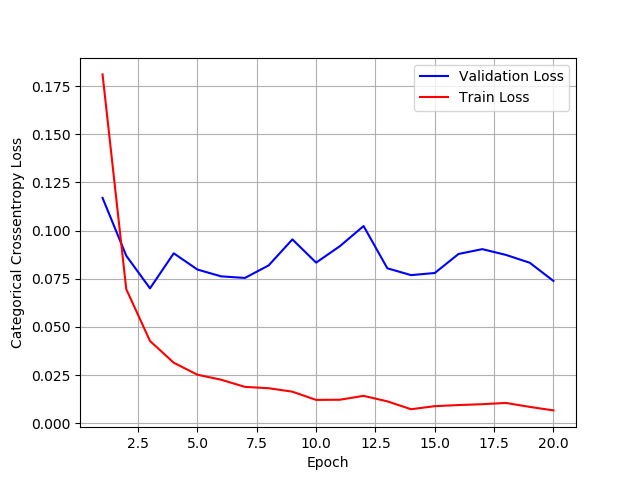

In [58]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 8. MLP-ReLu-BN-Adam (784-512-BN-256-BN-128-BN-10) </h2>

In [59]:
#Initilaiisng the layer

model8=Sequential()

#Hidden Layer 1

model8.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model8.add(Activation('relu'))

#Batch Normalization Layer
model8.add(BatchNormalization())

#Hidden Layer 2
model8.add(Dense(256,kernel_initializer='he_normal'))
model8.add(Activation('relu'))

#Batch Normalization Layer
model8.add(BatchNormalization())

#Hidden Layer 3
model8.add(Dense(128,kernel_initializer='he_normal'))
model8.add(Activation('relu'))

#Batch Normalization Layer
model8.add(BatchNormalization())

#Output layer
model8.add(Dense(Output,kernel_initializer='glorot_normal'))
model8.add(Activation(tf.nn.softmax))


In [60]:
#Model Summary
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_37 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
__________

In [61]:
#Compile
model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model8.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1820 - acc: 0.9451 - val_loss: 0.1067 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0701 - acc: 0.9788 - val_loss: 0.0862 - val_acc: 0.9726
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0466 - acc: 0.9850 - val_loss: 0.0846 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0792 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0284 - acc: 0.9906 - val_loss: 0.0774 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0245 - acc: 0.9918 - val_loss: 0.0777 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0224 - acc: 0.9923 - val_loss: 0.0727 -

In [62]:
#Test loss and Accuracy
score=model8.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 111us/step
The test loss is  0.0886129535915
The accuracy is  0.9793


<IPython.core.display.Javascript object>


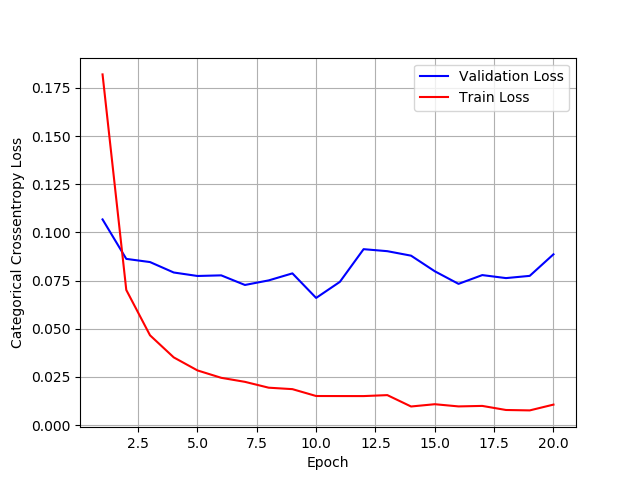

In [63]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 9. MLP-ReLu-BN-Adam(784-512-BN-256-BN-128-BN-64-BN-32-BN-10)</h2>

In [64]:
#Initialising all layers
model9=Sequential()

# Hidden Layer 1
model9.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model9.add(Activation('relu'))

#Batch Normalization Layer
model9.add(BatchNormalization())

#Hidden layer 2
model9.add(Dense(256,kernel_initializer='he_normal'))
model9.add(Activation('relu'))

#Batch Normalization Layer
model9.add(BatchNormalization())

#Hidden Layer 3
model9.add(Dense(128,kernel_initializer='he_normal'))
model9.add(Activation('relu'))

#Batch Normalization Layer
model9.add(BatchNormalization())

#Hidden layer 4
model9.add(Dense(64,kernel_initializer='he_normal'))
model9.add(Activation('relu'))

#Batch Normalization Layer
model9.add(BatchNormalization())

#Hidden Layer 5
model9.add(Dense(32,kernel_initializer='he_normal'))
model9.add(Activation('relu'))

#Batch Normalization Layer
model9.add(BatchNormalization())

#Output Layer
model9.add(Dense(Output,kernel_initializer='glorot_normal'))
model9.add(Activation(tf.nn.softmax))


In [65]:
#Model Summary
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_41 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_42 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
__________

In [66]:
#Compile
model9.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model9.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.2567 - acc: 0.9294 - val_loss: 0.1192 - val_acc: 0.9629
Epoch 2/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0913 - acc: 0.9723 - val_loss: 0.0954 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0639 - acc: 0.9800 - val_loss: 0.0954 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0517 - acc: 0.9841 - val_loss: 0.0931 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0415 - acc: 0.9867 - val_loss: 0.0876 - val_acc: 0.9736
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0345 - acc: 0.9887 - val_loss: 0.0735 - val_acc: 0.9778
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0335 - acc: 0.9894 - val_loss: 0.0736 -

In [67]:
#Test loss and Accuracy
score=model9.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 132us/step
The test loss is  0.113197082691
The accuracy is  0.9764


<IPython.core.display.Javascript object>


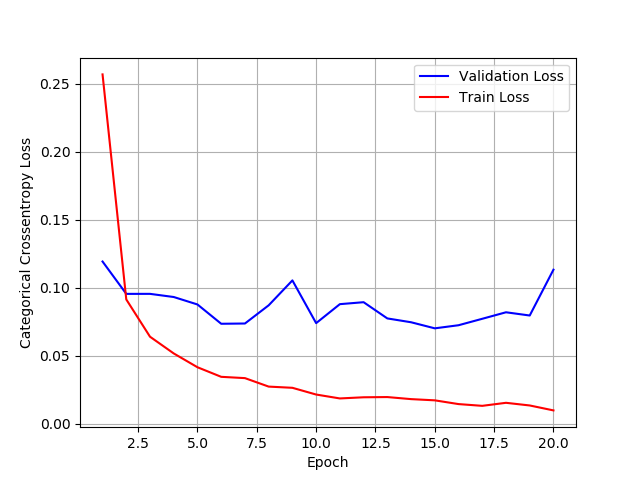

In [68]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 10. MLP-ReLu-BN-Dropout-Adam (784-512-BN-DP-256-BN-DP-10) </h2>

In [69]:
#Initialising all layers
model10=Sequential()

#Hidden Layer 1
model10.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model10.add(Activation('relu'))

#Batch Normalization layer
model10.add(BatchNormalization())

#Dropout layer
model10.add(Dropout(0.5))

#Hidden layer 2
model10.add(Dense(256,kernel_initializer='he_normal'))
model10.add(Activation('relu'))

#Batch Normalization layer
model10.add(BatchNormalization())

#Dropout layer
model10.add(Dropout(0.5))

#Output Layer
model10.add(Dense(Output,kernel_initializer='glorot_normal'))
model10.add(Activation(tf.nn.softmax))


In [70]:
#Model Summary
model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_47 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_48 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
__________

In [71]:
#Compile
model10.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model10.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.4150 - acc: 0.8751 - val_loss: 0.1359 - val_acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1905 - acc: 0.9415 - val_loss: 0.1014 - val_acc: 0.9679
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1485 - acc: 0.9538 - val_loss: 0.0830 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1294 - acc: 0.9602 - val_loss: 0.0750 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1126 - acc: 0.9642 - val_loss: 0.0717 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1039 - acc: 0.9680 - val_loss: 0.0713 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0940 - acc: 0.9708 - val_loss: 0.0692 - 

In [72]:
#Test loss and Accuracy
score=model10.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 110us/step
The test loss is  0.0567527698382
The accuracy is  0.9833


<IPython.core.display.Javascript object>


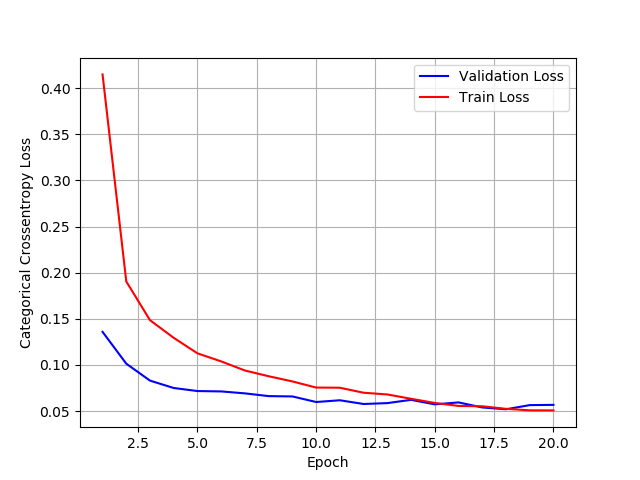

In [73]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 11.MLP-ReLu-DP-BN-Adam (784-512-DP-BN-256-DP-BN-128-DP-BN-10)</h2> 

In [74]:
#Initilaiisng the layer

model11=Sequential()

#Hidden Layer 1

model11.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model11.add(Activation('relu'))

#Batch Normalization Layer
model11.add(BatchNormalization())

#Drop out Layer
model11.add(Dropout(0.5))

#Hidden Layer 2
model11.add(Dense(256,kernel_initializer='he_normal'))
model11.add(Activation('relu'))

#Batch Normalization Layer
model11.add(BatchNormalization())

#Drop out Layer
model11.add(Dropout(0.5))

#Hidden Layer 3
model11.add(Dense(128,kernel_initializer='he_normal'))
model11.add(Activation('relu'))

#Batch Normalization Layer
model11.add(BatchNormalization())

#Drop out Layer
model11.add(Dropout(0.5))

#Output layer
model11.add(Dense(Output,kernel_initializer='glorot_normal'))
model11.add(Activation(tf.nn.softmax))


In [75]:
#Model summary
model11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_50 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_51 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
__________

In [76]:
#Compile
model11.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model11.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.5778 - acc: 0.8244 - val_loss: 0.1684 - val_acc: 0.9474
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2529 - acc: 0.9261 - val_loss: 0.1144 - val_acc: 0.9668
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1926 - acc: 0.9433 - val_loss: 0.1002 - val_acc: 0.9699
Epoch 4/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1645 - acc: 0.9510 - val_loss: 0.0896 - val_acc: 0.9729
Epoch 5/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1445 - acc: 0.9580 - val_loss: 0.0790 - val_acc: 0.9764
Epoch 6/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.1304 - acc: 0.9619 - val_loss: 0.0807 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1190 - acc: 0.9651 - val_loss: 0.0737 -

In [77]:
#Test loss and Accuracy
score=model11.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The Accuracy is ",score[1])

10000/10000 [==============================] - 1s 138us/step
The test loss is  0.0609957450023
The Accuracy is  0.983


<IPython.core.display.Javascript object>


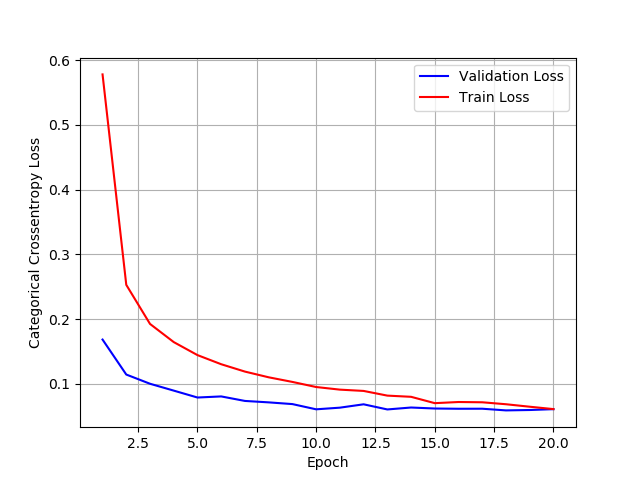

In [78]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 12. MLP-ReLu-BN-DP-Adam(784-512-BN-DP-256-BN-DP-128-BN-DP-64-BN-DP-32-BN-DP-10)</h2>

In [79]:
#Initialising all layers
model12=Sequential()

# Hidden Layer 1
model12.add(Dense(512,input_dim=Input,kernel_initializer='he_normal'))
model12.add(Activation('relu'))

#Batch Normalization Layer
model12.add(BatchNormalization())

#Dropout Layer
model12.add(Dropout(0.5))

#Hidden layer 2
model12.add(Dense(256,kernel_initializer='he_normal'))
model12.add(Activation('relu'))

#Batch Normalization Layer
model12.add(BatchNormalization())

#Dropout Layer
model12.add(Dropout(0.5))

#Hidden Layer 3
model12.add(Dense(128,kernel_initializer='he_normal'))
model12.add(Activation('relu'))

#Batch Normalization Layer
model12.add(BatchNormalization())

#Dropout Layer
model12.add(Dropout(0.5))

#Hidden layer 4
model12.add(Dense(64,kernel_initializer='he_normal'))
model12.add(Activation('relu'))

#Batch Normalization Layer
model12.add(BatchNormalization())

#Dropout Layer
model12.add(Dropout(0.5))

#Hidden Layer 5
model12.add(Dense(32,kernel_initializer='he_normal'))
model12.add(Activation('relu'))

#Batch Normalization Layer
model12.add(BatchNormalization())

#Dropout Layer
model12.add(Dropout(0.5))

#Output Layer
model12.add(Dense(Output,kernel_initializer='glorot_normal'))
model12.add(Activation(tf.nn.softmax))


In [80]:
#Model Summary
model12.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_54 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_55 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
__________

In [81]:
#Compile
model12.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model12.fit(X_train,Y_train,batch_size=batch,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 245us/step - loss: 1.4905 - acc: 0.5009 - val_loss: 0.4474 - val_acc: 0.9027
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.6451 - acc: 0.8110 - val_loss: 0.2092 - val_acc: 0.9404
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.4205 - acc: 0.8910 - val_loss: 0.1544 - val_acc: 0.9568
Epoch 4/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.3317 - acc: 0.9176 - val_loss: 0.1383 - val_acc: 0.9634
Epoch 5/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2789 - acc: 0.9333 - val_loss: 0.1257 - val_acc: 0.9696
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2562 - acc: 0.9399 - val_loss: 0.1234 - val_acc: 0.9698
Epoch 7/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.2362 - acc: 0.9464 - val_loss: 0.

In [82]:
#Test loss and accuracy
score=model12.evaluate(X_test,Y_test)
print("The test loss is ",score[0])
print("The accuracy is ",score[1])

10000/10000 [==============================] - 1s 138us/step
The test loss is  0.0800626712134
The accuracy is  0.9813


<IPython.core.display.Javascript object>


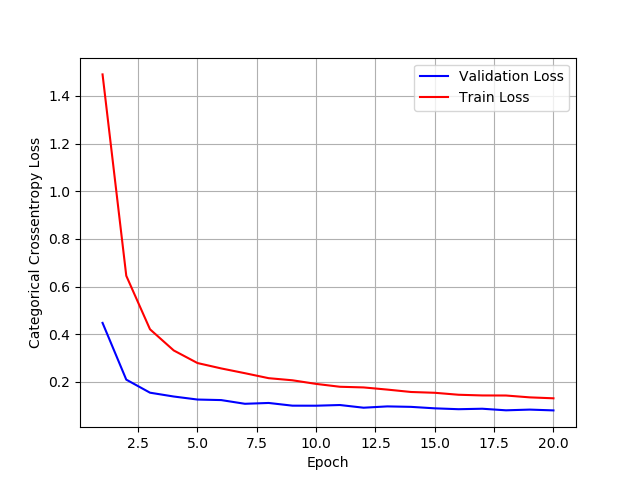

In [83]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2><u> Conclusions</u> </h2>

<h3> MLP Without Batch Normalization and Dropouts </h3>

<table style="width:100%">
  <tr>
    <th>Layers</th>  
    <th>Training Accuracy</th>
    <th>Test Accuracy </th> 
    <th>Train Loss</th>
    <th>Test loss</th>
  </tr>
  <tr>
    <td>784-512-256-10 </td>  
    <td>99.64</td>
    <td>97.50</td> 
    <td>0.0123</td>
    <td>0.1195</td> 
  </tr>
  <tr>
    <td>784-512-256-128-10 </td>  
    <td>99.76</td>
    <td>98.25</td> 
    <td>0.0076</td>
    <td>0.0839</td> 
  </tr>
  <tr>
    <td>784-512-256-128-64-32-10 </td>  
    <td>99.65</td>
    <td>98.42</td> 
    <td>0.011</td>
    <td>0.0756</td> 
  </tr>
</table>

<h3> MLP With Batch Normalization </h3>

<table style="width:100%">
  <tr>
    <th>Layers</th>  
    <th>Training Accuracy</th>
    <th>Test Accuracy </th> 
    <th>Train Loss</th>
    <th>Test loss</th>
  </tr>
  <tr>
    <td>784-512-BN-256-BN-10 </td>  
    <td>99.64</td>
    <td>97.50</td> 
    <td>0.0123</td>
    <td>0.1195</td> 
  </tr>
  <tr>
    <td>784-512-BN-256-BN-128-BN-10 </td>  
    <td>99.76</td>
    <td>98.25</td> 
    <td>0.0076</td>
    <td>0.0839</td> 
  </tr>
  <tr>
    <td>784-512-BN-256-BN-128-BN-64-BN-32-BN-10 </td>  
    <td>99.65</td>
    <td>98.42</td> 
    <td>0.011</td>
    <td>0.0756</td> 
  </tr>
</table>

<h3> MLP With Drop outs </h3>

<table style="width:100%">
  <tr>
    <th>Layers</th>  
    <th>Training Accuracy</th>
    <th>Test Accuracy </th> 
    <th>Train Loss</th>
    <th>Test loss</th>
  </tr>
  <tr>
    <td>784-512-DP-256-DP-10 </td>  
    <td>98.44</td>
    <td>98.30</td> 
    <td>0.0510</td>
    <td>0.0617</td> 
  </tr>
  <tr>
    <td>784-512-DP-256-DP-128-DP-10 </td>  
    <td>98.21`</td>
    <td>98.24</td> 
    <td>0.0608</td>
    <td>0.0644</td> 
  </tr>
  <tr>
    <td>784-512-DP-256-DP-128-DP-64-DP-32-DP-10 </td>  
    <td>95.63</td>
    <td>97.44</td> 
    <td>0.1851</td>
    <td>0.1242</td> 
  </tr>
</table>

<h3> MLP With Batch Normalization and Dropouts </h3>

<table style="width:100%">
  <tr>
    <th>Layers</th>  
    <th>Training Accuracy</th>
    <th>Test Accuracy </th> 
    <th>Train Loss</th>
    <th>Test loss</th>
  </tr>
  <tr>
    <td>784-512-BN-DP-256-BN-DP-10 </td>  
    <td>98.32</td>
    <td>98.33</td> 
    <td>0.0508</td>
    <td>0.0568</td> 
  </tr>
  <tr>
    <td>784-512-BN-DP-256-BN-DP-128-BN-DP-10 </td>  
    <td>98.09</td>
    <td>98.30</td> 
    <td>0.0611</td>
    <td>0.0610</td> 
  </tr>
  <tr>
    <td>784-512-BN-DP-256-BN-DP-128-BN-DP-64-BN-DP-32-BN-DP-10 </td>  
    <td>97.09</td>
    <td>98.13</td> 
    <td>0.1308</td>
    <td>0.0801</td> 
  </tr>
</table>